In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from src.gebpy.core.rocks.isotropic_rocks import IsotropicRocks

In [3]:
n_datasets = 1000

data_sandstone = IsotropicRocks(name="Sandstone", random_seed=42).generate_dataset(number=n_datasets)
data_limestone = IsotropicRocks(name="Limestone", random_seed=42).generate_dataset(number=n_datasets)

In [4]:
data_sandstone

,rho,K,G,GR,PE,porosity,rho_s,rho_f,vP,vS,...,w.MnO,w.NiO,w.H2O,w.Fe2O3,w.SO3,phi.Quartz,phi.Alkali feldspar,phi.Plagioclase,phi.Chlorite,phi.Pyrite
0,2371.028457,37.627662,34.576540,6.070250,2.547645,0.209720,2734.863315,1000.0,5942.530533,3818.760140,...,0.001033,0.000327,0.004297,0.030687,0.042195,0.872849,0.053465,0.004532,0.037539,0.031614
1,2145.880907,30.949253,27.512483,5.251266,2.053181,0.314649,2671.963285,1000.0,5614.035017,3580.651743,...,0.002635,0.000069,0.001104,0.007795,0.012884,0.880589,0.098993,0.000538,0.010227,0.009654
2,2220.343340,33.808427,30.389201,1.103490,1.990187,0.274342,2681.705917,1000.0,5785.811601,3699.555693,...,0.000129,0.000210,0.000094,0.001011,0.001751,0.860889,0.009968,0.126901,0.000930,0.001312
3,2485.819873,42.280017,40.005229,0.040213,2.215815,0.123544,2695.259595,1000.0,6202.121543,4011.654769,...,0.001915,0.001169,0.005563,0.015901,0.021081,0.850875,0.007229,0.079712,0.046390,0.015795
4,2136.255178,30.890545,27.127061,1.194399,2.378819,0.343906,2731.847059,1000.0,5602.799483,3563.483935,...,0.000097,0.000302,0.000148,0.024036,0.048034,0.865135,0.084273,0.013246,0.001357,0.035989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2273.740743,34.019081,31.078715,7.462036,2.390918,0.259753,2720.697893,1000.0,5760.767572,3697.098784,...,0.000545,0.000798,0.002595,0.019252,0.027921,0.885989,0.034546,0.035818,0.022727,0.020919
996,2565.737569,37.948069,42.045030,1.192945,2.433082,0.100577,2740.824845,1000.0,6053.081794,4048.099863,...,0.000619,0.000159,0.000257,0.024745,0.048793,0.941548,0.006732,0.012676,0.002485,0.036558
997,2107.546494,31.022673,26.373809,0.445542,2.115680,0.348342,2699.582766,1000.0,5604.027173,3537.511404,...,0.000017,0.000083,0.000071,0.008690,0.017202,0.850002,0.005763,0.130710,0.000636,0.012889
998,2393.960186,39.533051,37.048607,1.705395,2.047480,0.170224,2679.923676,1000.0,6094.928253,3933.937703,...,0.000351,0.000684,0.000912,0.004914,0.003121,0.852018,0.019620,0.117196,0.008829,0.002338


In [5]:
data_sandstone.head()
data_sandstone.info()
data_sandstone.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rho                  1000 non-null   float64
 1   K                    1000 non-null   float64
 2   G                    1000 non-null   float64
 3   GR                   1000 non-null   float64
 4   PE                   1000 non-null   float64
 5   porosity             1000 non-null   float64
 6   rho_s                1000 non-null   float64
 7   rho_f                1000 non-null   float64
 8   vP                   1000 non-null   float64
 9   vS                   1000 non-null   float64
 10  vP/vS                1000 non-null   float64
 11  E                    1000 non-null   float64
 12  poisson              1000 non-null   float64
 13  lame                 1000 non-null   float64
 14  w.O                  1000 non-null   float64
 15  w.Si                 1000 non-null   fl

,count,mean,std,min,25%,50%,75%,max
rho,1000.0,2326.127859,127.980412,2.076979e+03,2214.199244,2325.251353,2434.706069,2591.811500
K,1000.0,36.450512,4.762498,2.442058e+01,32.820143,36.215618,39.664201,51.013038
G,1000.0,32.986088,4.711618,2.347705e+01,28.837764,32.882577,36.867093,43.310419
GR,1000.0,3.689320,5.111335,1.242316e-04,0.276931,1.432173,4.914965,29.138478
PE,1000.0,2.397623,0.385784,1.807640e+00,2.095742,2.344218,2.639018,3.712783
porosity,1000.0,0.224116,0.072945,1.003083e-01,0.159582,0.223517,0.289612,0.349776
rho_s,1000.0,2709.238892,38.551208,2.636351e+03,2680.011037,2706.238372,2735.957551,2818.274573
rho_f,1000.0,1000.000000,0.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
vP,1000.0,5865.185696,220.655165,5.222213e+03,5696.822302,5868.261374,6048.452020,6272.042999
vS,1000.0,3753.239305,173.010161,3.300737e+03,3612.095804,3757.681728,3892.177115,4113.545918


In [6]:
data_limestone

,rho,K,G,GR,PE,porosity,rho_s,rho_f,vP,vS,...,w.Fe2O3,w.SO3,phi.Calcite,phi.Dolomite,phi.Quartz,phi.Alkali feldspar,phi.Plagioclase,phi.Kaolinite,phi.Illite,phi.Pyrite
0,2335.921768,60.760739,24.472806,8.392330,4.658485,0.231664,2738.719719,1000.0,6323.007629,3236.776657,...,0.002015,0.004042,0.804691,0.000194,0.000130,0.000816,0.111926,0.000629,0.078585,0.003028
1,2115.054863,49.773115,17.331853,3.749863,4.797095,0.357579,2735.708383,1000.0,5870.161870,2862.606714,...,0.002343,0.004698,0.844813,0.111582,0.000328,0.000116,0.000347,0.003845,0.035447,0.003520
2,2189.665874,52.741214,18.685092,0.470513,5.134736,0.309210,2722.182686,1000.0,5955.179617,2921.182571,...,0.003268,0.006554,0.989507,0.000063,0.000065,0.000583,0.000701,0.000327,0.003844,0.004910
3,2528.825550,69.738544,30.097280,0.948441,5.001281,0.128253,2753.749549,1000.0,6591.384865,3449.881593,...,0.013583,0.027238,0.879030,0.003083,0.012651,0.017404,0.006063,0.053297,0.008064,0.020408
4,2042.788416,49.172947,17.403108,5.380489,4.522549,0.392687,2717.051851,1000.0,5952.355609,2918.782395,...,0.002914,0.005844,0.806339,0.007712,0.006474,0.011988,0.013151,0.100621,0.049336,0.004379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2236.585914,57.461540,23.330122,19.317220,4.807547,0.291704,2745.860601,1000.0,6292.837705,3229.726251,...,0.001932,0.003875,0.800048,0.001567,0.004145,0.087881,0.099653,0.000636,0.003168,0.002903
996,2570.369215,72.104931,31.754447,6.534637,4.763118,0.100693,2746.198542,1000.0,6672.662024,3514.831620,...,0.002121,0.004253,0.816322,0.034788,0.005874,0.024359,0.081449,0.013016,0.021006,0.003186
997,2021.755658,49.235103,17.869958,8.302951,4.513433,0.398011,2697.298278,1000.0,6011.468760,2973.017282,...,0.000184,0.000369,0.819109,0.000015,0.000515,0.107370,0.002479,0.070222,0.000014,0.000277
998,2452.060468,65.577784,27.368887,0.172124,4.954353,0.184269,2780.072497,1000.0,6451.826670,3340.896213,...,0.014696,0.029472,0.800674,0.135690,0.009204,0.001918,0.000718,0.029663,0.000051,0.022081


In [7]:
data_limestone.head()
data_limestone.info()
data_limestone.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rho                  1000 non-null   float64
 1   K                    1000 non-null   float64
 2   G                    1000 non-null   float64
 3   GR                   1000 non-null   float64
 4   PE                   1000 non-null   float64
 5   porosity             1000 non-null   float64
 6   rho_s                1000 non-null   float64
 7   rho_f                1000 non-null   float64
 8   vP                   1000 non-null   float64
 9   vS                   1000 non-null   float64
 10  vP/vS                1000 non-null   float64
 11  E                    1000 non-null   float64
 12  poisson              1000 non-null   float64
 13  lame                 1000 non-null   float64
 14  w.C                  1000 non-null   float64
 15  w.O                  1000 non-null   fl

,count,mean,std,min,25%,50%,75%,max
rho,1000.0,2306.863381,154.765434,2.021756e+03,2170.253965,2308.890824,2438.538839,2656.077920
K,1000.0,58.852065,7.215714,4.226131e+01,52.729280,58.805428,64.616548,75.497105
G,1000.0,23.937564,4.391679,1.471180e+01,20.136175,23.646432,27.577243,35.701501
GR,1000.0,5.916731,6.754110,6.753497e-05,0.557786,3.197217,9.184687,36.974840
PE,1000.0,4.774645,0.263335,4.376233e+00,4.561140,4.707052,4.953526,5.689553
porosity,1000.0,0.248940,0.087533,1.003699e-01,0.171499,0.248220,0.327534,0.399731
rho_s,1000.0,2740.011402,36.531870,2.682603e+03,2711.404881,2728.459579,2762.092630,2869.345067
rho_f,1000.0,1000.000000,0.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
vP,1000.0,6253.046727,255.746867,5.624992e+03,6055.843269,6259.950211,6440.744701,6873.267421
vS,1000.0,3203.622591,196.632069,2.690301e+03,3045.886682,3205.004398,3357.391413,3668.072351


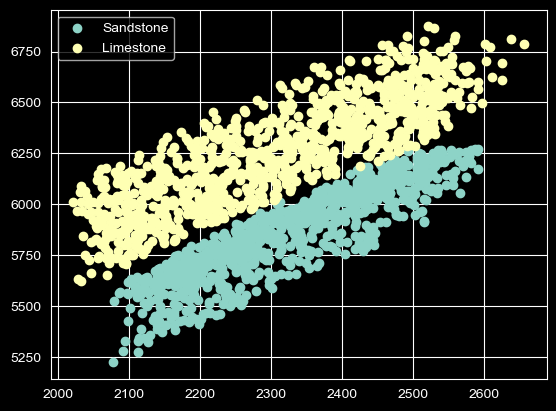

In [8]:
fig, ax = plt.subplots()

ax.scatter(data_sandstone["rho"], data_sandstone["vP"], label="Sandstone")
ax.scatter(data_limestone["rho"], data_limestone["vP"], label="Limestone")

ax.legend()


In [9]:
variances = data_sandstone.var().sort_values()
variances

rho_f                  0.000000e+00
w.H                    1.798019e-07
w.Mg                   6.634391e-06
w.Na                   7.872114e-06
w.K                    1.020543e-05
w.Na2O                 1.430351e-05
w.H2O                  1.435760e-05
w.K2O                  1.480873e-05
w.MgO                  1.824401e-05
w.Mn                   2.251670e-05
w.Al                   2.302236e-05
w.Ni                   2.699334e-05
w.MnO                  3.754090e-05
w.Ca                   4.175530e-05
w.NiO                  4.371516e-05
w.S                    5.879482e-05
w.O                    6.071361e-05
w.Fe                   6.612945e-05
w.CaO                  8.174649e-05
w.Al2O3                8.218825e-05
w.FeO                  1.094479e-04
w.Fe2O3                1.351778e-04
w.Si                   1.358453e-04
phi.Pyrite             2.058069e-04
w.SO3                  3.666154e-04
w.SiO2                 6.217261e-04
poisson                7.922673e-04
phi.Chlorite           1.243

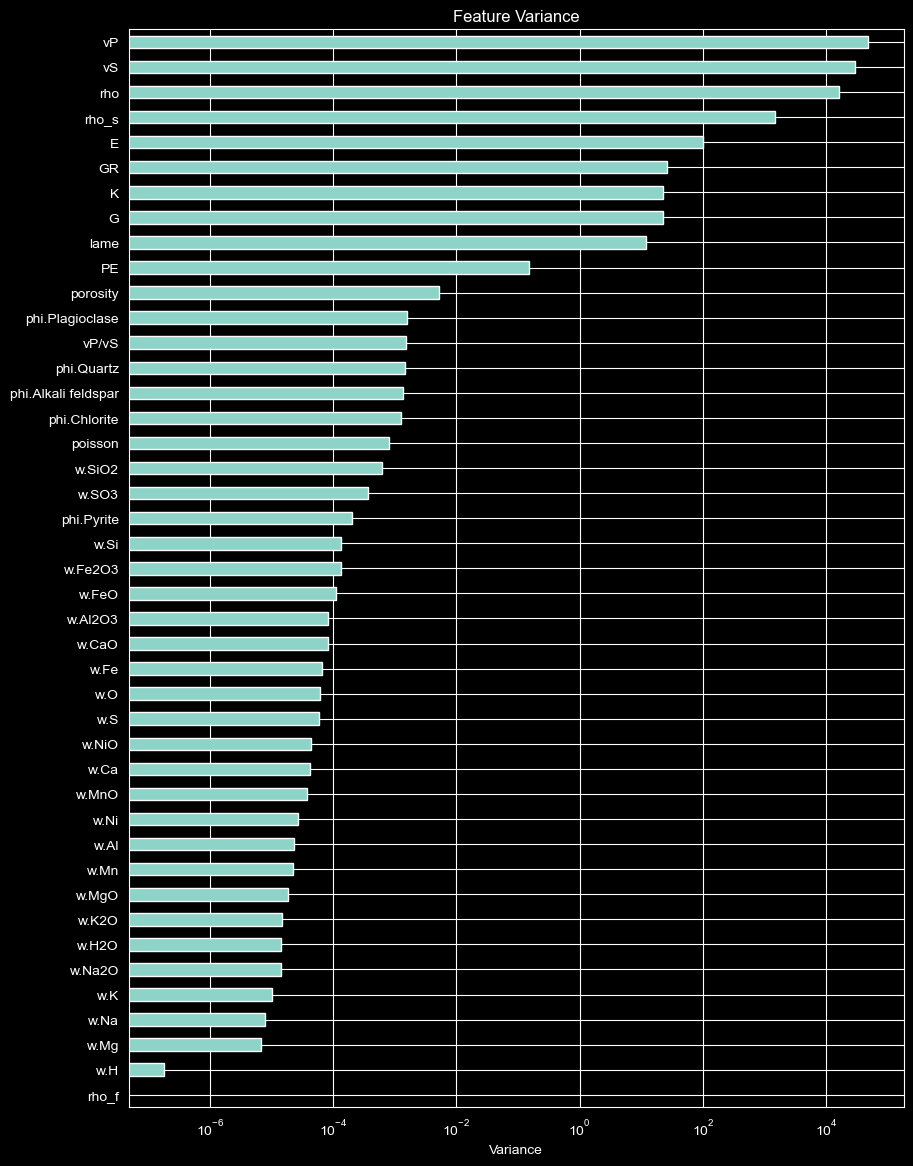

In [10]:
plt.figure(figsize=(10, 14))
variances.plot(kind='barh')
plt.title("Feature Variance")
plt.xlabel("Variance")
plt.xscale("log")
plt.show()

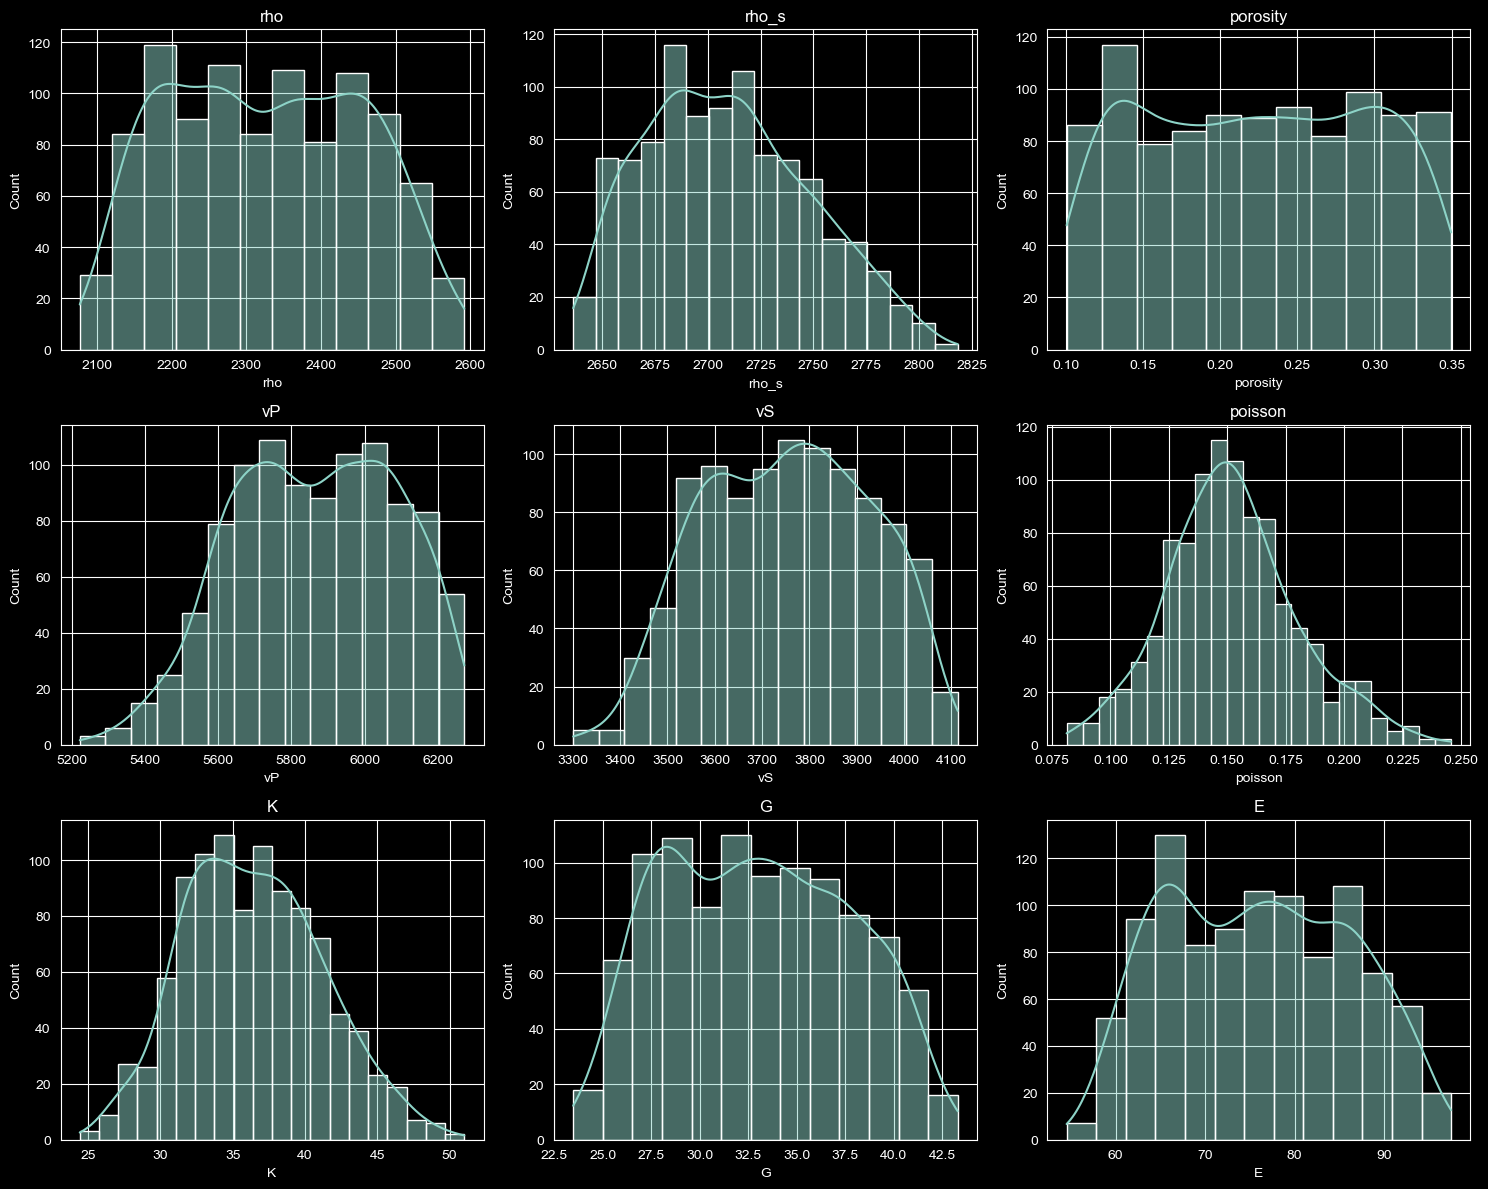

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

columns = ["rho", "rho_s", "porosity", "vP", "vS", "poisson", "K", "G", "E"]

for ax, col in zip(axes, columns):
    sns.histplot(data_sandstone[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()

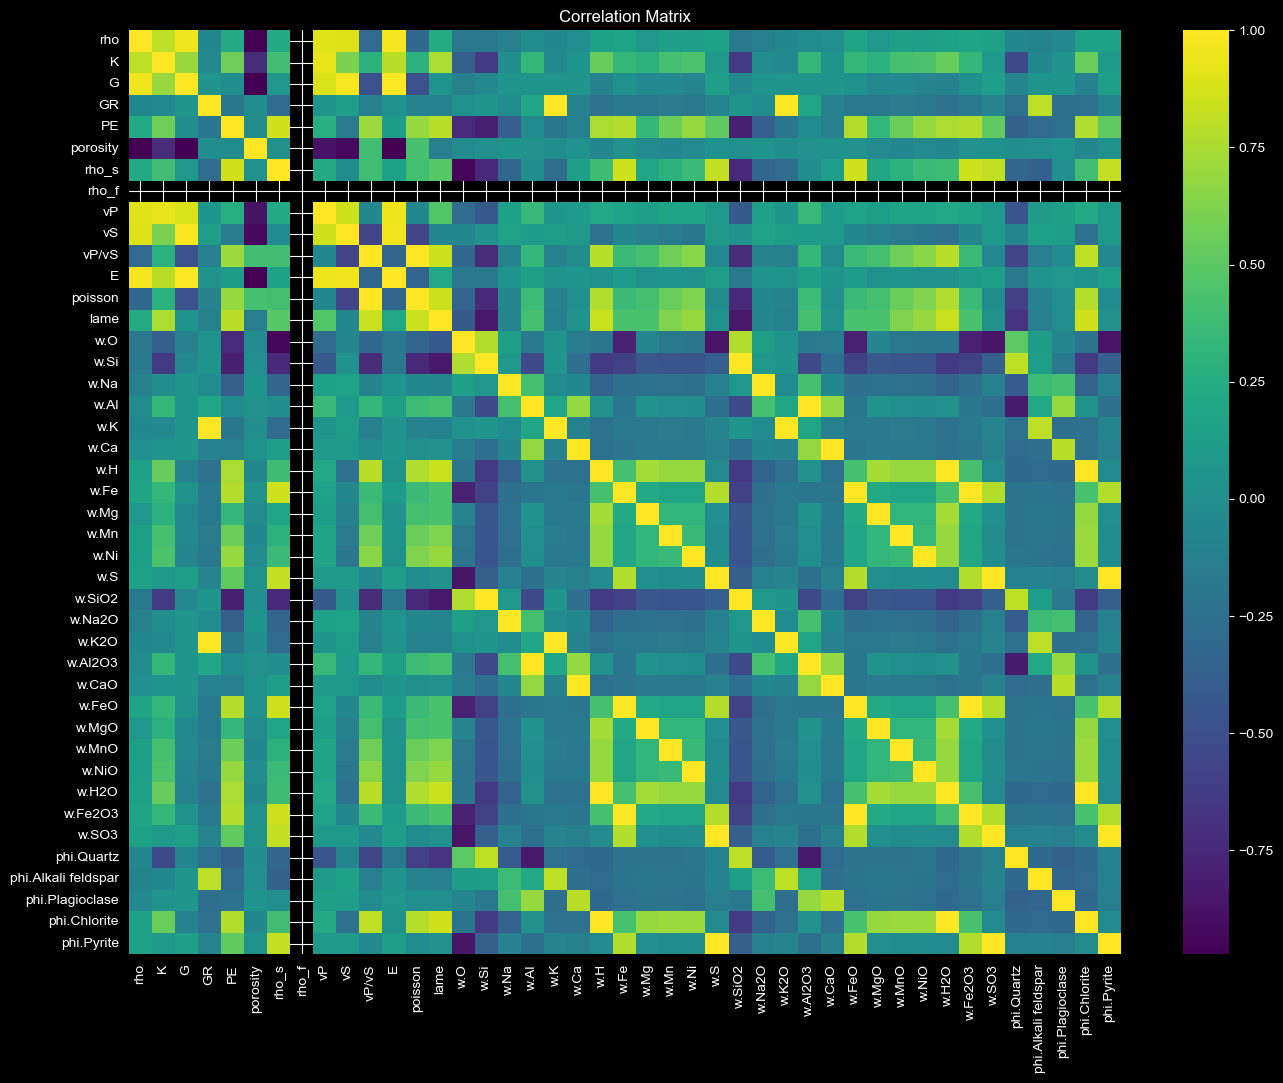

In [12]:
plt.figure(figsize=(16, 12))
corr = data_sandstone.corr()
sns.heatmap(corr, annot=False, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

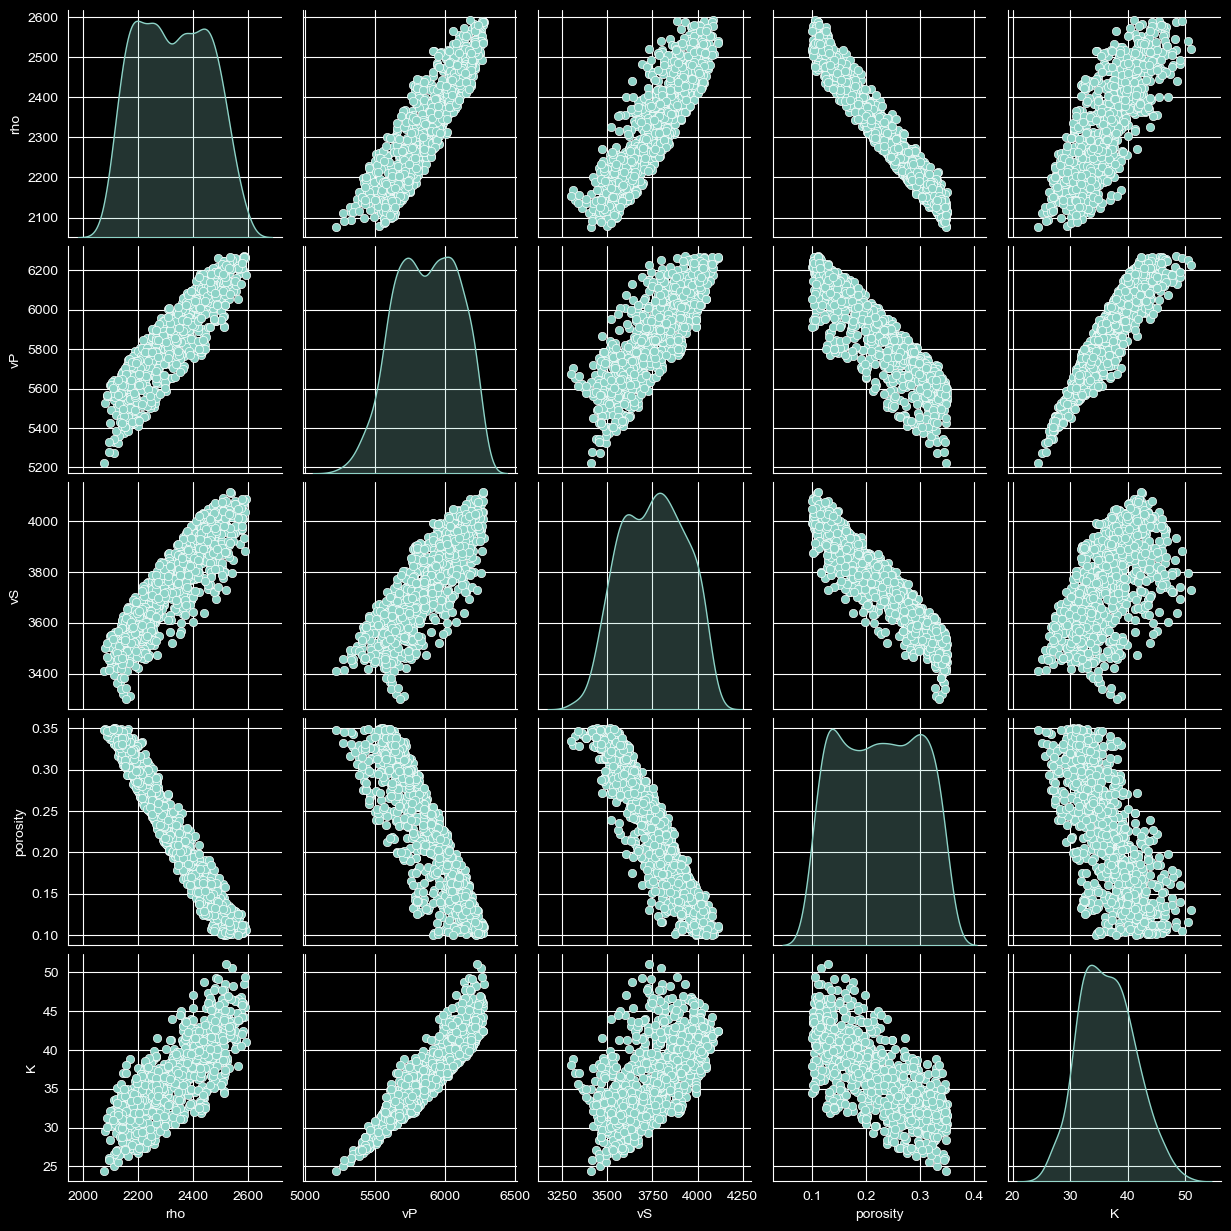

In [13]:
sns.pairplot(data_sandstone[["rho", "vP", "vS", "porosity", "K"]], diag_kind="kde")

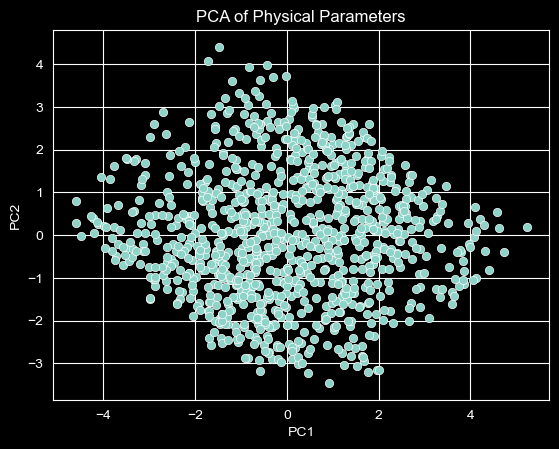

,PC1,PC2
rho,-0.439398,-0.379211
rho_s,-0.382408,0.443723
vP,-0.475261,-0.306433
vS,-0.357177,-0.488151
w.Si,0.383312,-0.385448
w.O,0.400396,-0.422547


In [14]:
#X = data_sandstone[["rho", "vP", "vS", "porosity", "E", "G", "K"]]
X = data_sandstone[["rho", "rho_s", "vP", "vS", "w.Si", "w.O"]]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(components, columns=["PC1", "PC2"])

sns.scatterplot(x="PC1", y="PC2", data=df_pca)
plt.title("PCA of Physical Parameters")
plt.show()

loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=["PC1", "PC2"]
)
loadings

In [15]:
# Export dataframe to csv
data_limestone.to_csv("data_limestone_" + str(n_datasets) + ".csv", index=False)